#OpenCV Color Spaces

Welcome to this notebook, where we will explore color space in image processing using OpenCV. Color space defines how colors are represented and organized in an image. OpenCV provides a range of functions and tools to work with color spaces, enabling us to manipulate and analyze images based on their color components.In this notebook, we will focus on several commonly used color spaces in OpenCV, including:


*   RGB (Red, Green, Blue)
*   HSV (Hue, Saturation, Value)
*   LAB
*   YCrCb
*   CMYK
*   XYZ

Understanding these color spaces and their properties is crucial for various image processing tasks such as image filtering, segmentation, object detection, and color-based analysis.

In this notebook, we will use Python code to demonstrate how to perform various color space conversions in OpenCV. By the end of this tutorial, you will gain a comprehensive understanding of different color spaces and their practical uses. This knowledge will enable you to efficiently handle color-related tasks in image processing.


Let's dive in and explore the fascinating world of color space in OpenCV!








#Python getting started

Firstly, to get access to images we need to Mount the Google Drive to Google Colab.


In [1]:


from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
# Importing the necessary Python packages


import os                            # Importing os for interacting with the operating system, such as file handling and directory manipulation
import numpy as np                   # Importing numpy for efficient numerical operations and array manipulation
from google.colab.patches import cv2_imshow         # Importing cv2_imshow from google.colab.patches to display images in Google Colab
import cv2                           # Importing cv2 from OpenCV for computer vision tasks
from PIL import Image                # Importing PIL.Image for image processing capabilities
import imutils                       # Importing imutils for image resizing, rotating, and cropping
import matplotlib.pyplot as plt      # Importing matplotlib.pyplot for creating visualizations

# These imported packages will be essential for our image processing and computer vision tasks.


##Loading Image with OpenCV

In OpenCV, images are typically read in the default BGR (Blue, Green, Red) color format. However, for various purposes and compatibility with other libraries or applications, it may be desirable to work with images in the RGB format.

The provided code accomplishes this by defining a function called read_image() that takes a file path as input. Inside the function, cv2.imread() reads the image in the BGR format. The indexing operation [..., ::-1] is then applied to reverse the order of color channels, effectively converting the image from BGR to RGB format.



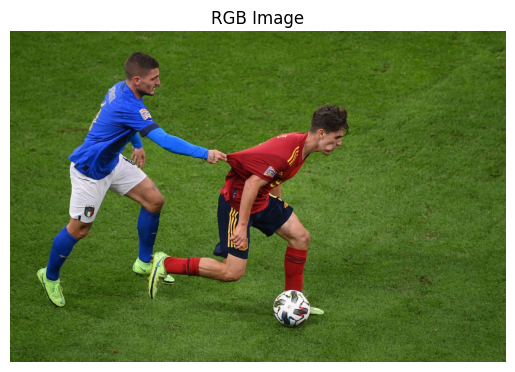

In [4]:
def read_image(file_path):
    # Read the image directly in RGB format
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)[..., ::-1] #The indexing operation [..., ::-1] is used to reverse the order of color channels, effectively converting BGR to RGB.
    return img

file_path = r"/content/color_space.jpg"
image_rgb = read_image(file_path)

plt.imshow(image_rgb)
plt.title("RGB Image")
plt.axis('off')
plt.show()

In [5]:
# Print image information
print(f"Image width: {image_rgb.shape[1]} \nImage height: {image_rgb.shape[0]} \nNumber of channels: {image_rgb.shape[2] if len(image_rgb.shape) == 3 else 1} \nImage data type: {image_rgb.dtype}")

Image width: 1200 
Image height: 800 
Number of channels: 3 
Image data type: uint8


#RGB color space
The RGB color space, an acronym for Red, Green, and Blue components, is a fundamental color model extensively employed in computer vision and image processing applications. It serves as the cornerstone for representing and manipulating color information in various digital imaging systems and is widely supported by color applications and libraries by default.

This color space encompasses three primary channels—red, green, and blue—each represented by intensity values ranging from 0 to 255. The RGB color model generates millions of distinct colors by combining different intensities of these channels. Understanding the RGB color space principles is crucial for comprehending color analysis, image enhancement, and a broad spectrum of computer vision tasks.

As you can see, a visual representation of the RGB color space. In this model, an RGB color is represented by a tuple of three values ranging from 0 to 255. By envisioning a cube, we can visualize the vast range of colors achievable by adjusting the amounts of red, green, and blue.

The RGB cube encapsulates 256×256×256 = 16,777,216 distinct colors, with each color corresponding to a unique combination of red, green, and blue values. Mixing red and green intensities produces yellow while combining red and blue intensities yields pink. Adding all three primary colors together creates white. However, despite its prevalent usage for displaying colors on monitors, the RGB color space may not be optimal for computer vision applications.

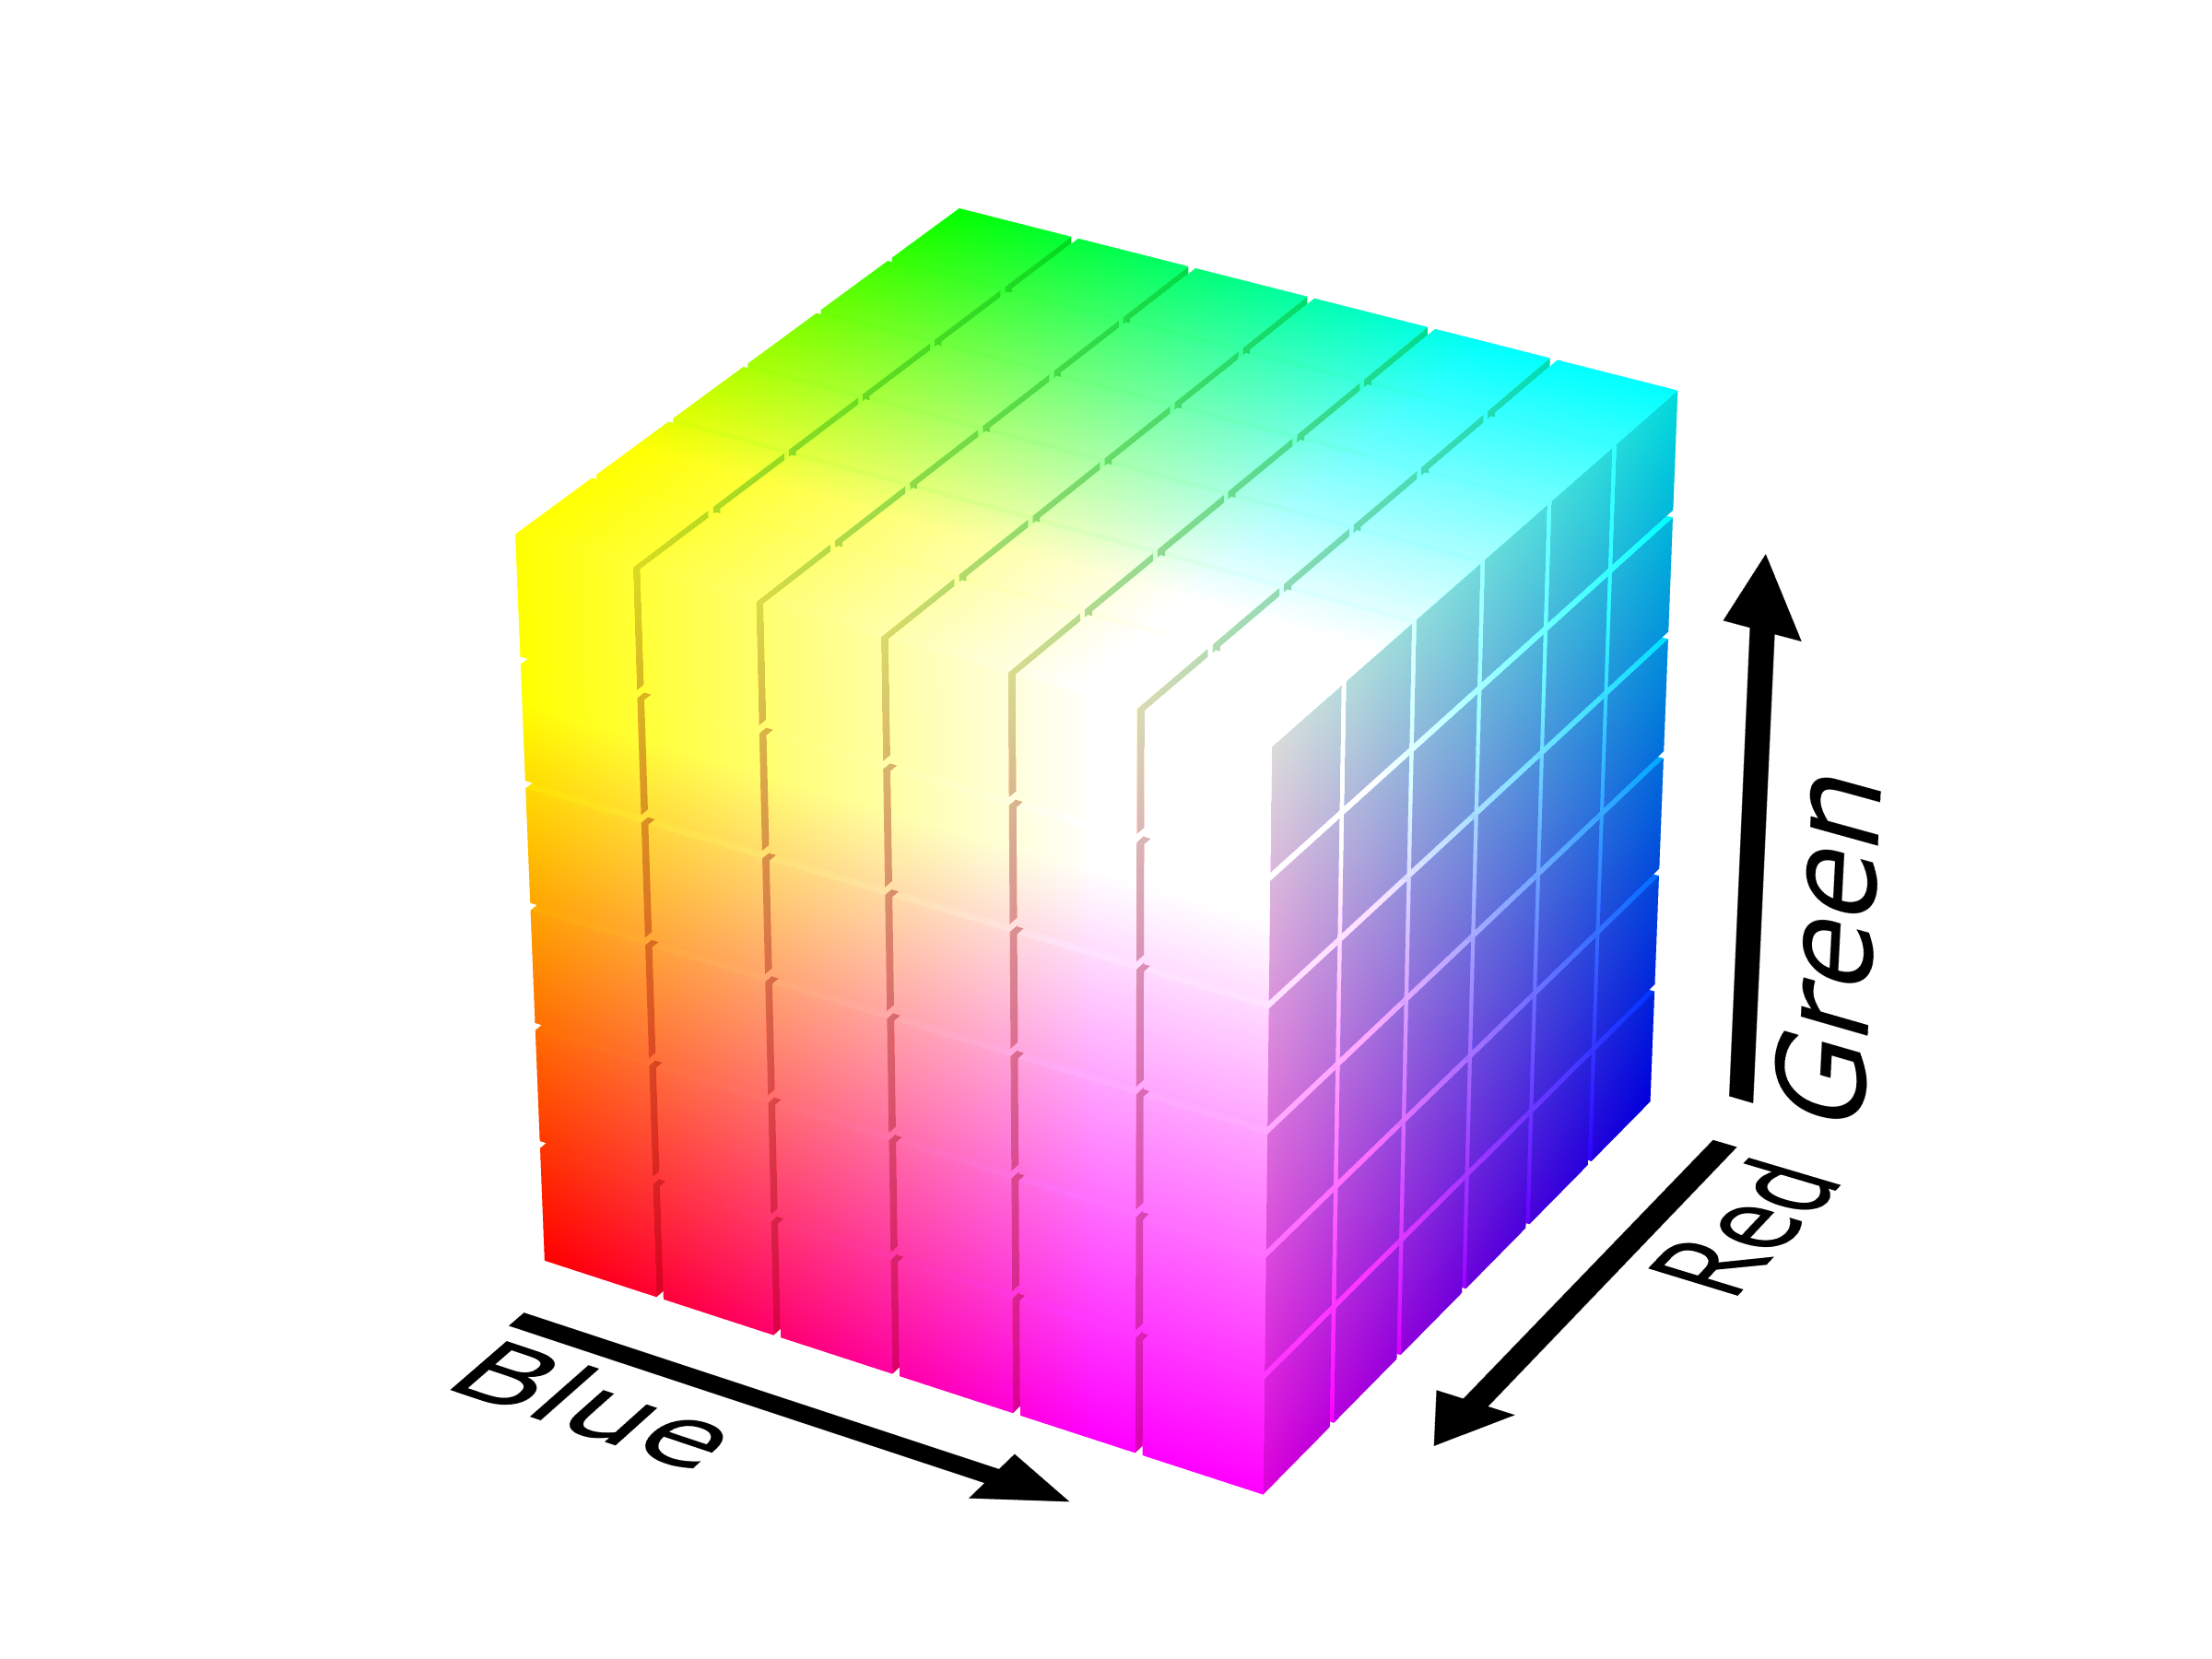



Determining the precise red, green, and blue intensities required to achieve a specific color can be challenging within the RGB color space. Consequently, alternative color spaces like HSL (Hue, Saturation, Lightness) or Lab color space often offer more user-friendly and intuitive representations for color analysis and manipulation.

For example, exploring other color models can prove advantageous if we determine the appropriate red, green, and blue values needed to produce a desired color. By leveraging these alternative spaces, we can navigate the complexities of precisely quantifying the amounts of red, green, and blue required to generate a specific color.

Developing a comprehensive understanding of the strengths and limitations of the RGB color space enables us to explore alternative color models better suited for specific computer vision applications and facilitates effective color manipulation and analysis.


Here is a practical example of Python using the OpenCV library. The code aims to visually represent the individual color channels within an input image. It does this by splitting the image into its respective color channels and displaying each channel separately.

The channels are presented both in grayscale, showcasing the intensity values, and in colored forms, highlighting each channel's specific contribution to the image's overall appearance. By employing subplots, the code facilitates a comprehensive visualization of the color distribution within the image, enabling a deeper understanding of how each channel influences the final result.


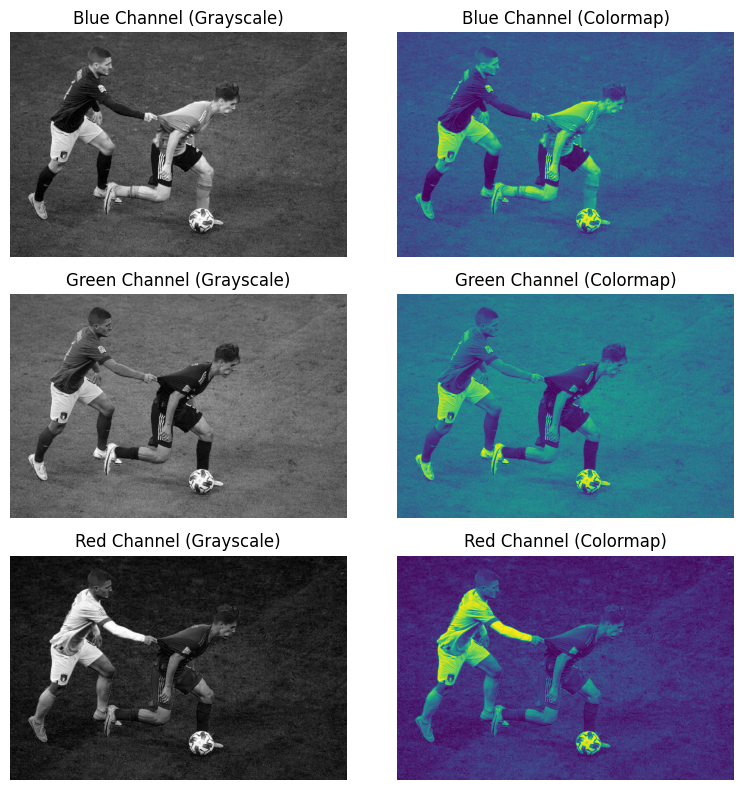

In [6]:
def display_channels(image):

# Split the image into individual color channels
    channels = cv2.split(image_rgb)

    # Define channel names
    channel_names = ['Blue Channel', 'Green Channel', 'Red Channel']

    # Create subplots for each channel
    fig, axes = plt.subplots(len(channels),2, figsize=(8, 8))

    for i, (channel, name) in enumerate(zip(channels,channel_names)):
      # Grayscale image
      axes[i, 0].imshow(channel, cmap="gray")
      axes[i, 0].axis('off')
      axes[i, 0].set_title(f"{name} (Grayscale)")

      # Colored image
      axes[i,1].imshow(channel)
      axes[i,1].axis('off')
      axes[i,1].set_title(f"{name} (Colormap)")

    #Automatically adjust the subplot positions and sizes
    plt.tight_layout()
    # Show the plot
    plt.show()

# Assuming 'image_rgb' is defined and contains the image array
display_channels(image_rgb)


#HSV color space

The HSV color space transforms the RGB color space, representing colors as a cylinder instead of a cube. It introduces separate dimensions for hue, saturation, and value, which define different aspects of color.



* Hue: Refers to the "pure" color being examined, such as different shades and tones of red sharing the same hue.
* Saturation: Represents the level of "whiteness" in color, with full saturation indicating a pure, intense color and zero saturation representing pure white.
* Value: Controls the lightness of the color, ranging from pure black at zero value to lighter shades as the value increases.


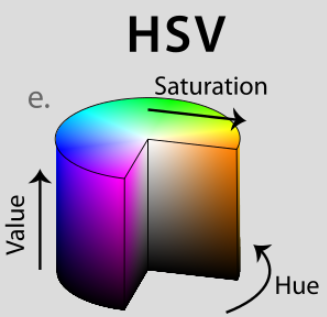

Different computer vision libraries may use different value ranges for each component. In OpenCV, which represents images as 8-bit unsigned integer arrays, the hue values range from 0 to 179 (180 possible values), resembling degrees on the HSV color cylinder. Saturation and value are both represented in the range of 0 to 255.

The code snippet demonstrates how to convert an image to the HSV (Hue, Saturation, Value) color space using the *cv2.cvtColor* function from the OpenCV library. The function takes two arguments: the original image and the desired output color space, which in this case is *cv2.COLOR_RGB2HSV*.

By executing *display_hsv_channels(image_rgb)*, you can visualize the HSV channels of the provided RGB image.

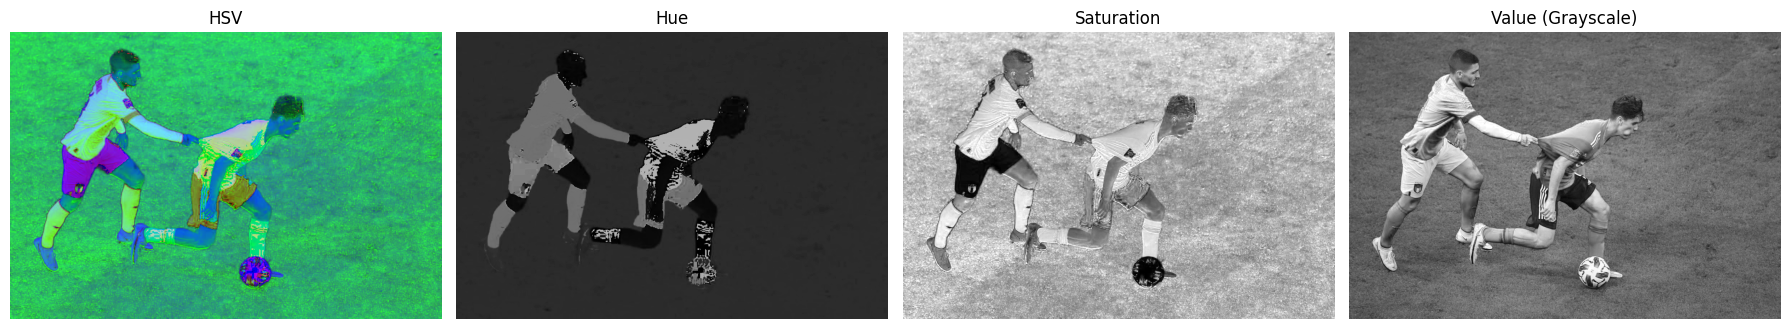

In [7]:
def display_hsv_channels(image):

    # Convert the image to the HSV color space
    hsv_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

    # Define channel names
    channel_names = ['Hue', 'Saturation', 'Value (Grayscale)']

    # Create a figure with subplots for channels and the original image
    fig, axes = plt.subplots(1, len(channel_names) + 1, figsize=(18, 6))

    # Display the original image in HSV format
    axes[0].imshow(hsv_image)
    axes[0].set_title('HSV')
    axes[0].axis('off')

    # Display the HSV channels
    for i, name in enumerate(channel_names):
        axes[i+1].imshow(hsv_image[:, :, i], cmap='gray', vmin=0, vmax=255)
        #axes[i+1].imshow(hsv_image[:, :, i], vmin=0, vmax=255)
        axes[i+1].set_title(name)
        axes[i+1].axis('off')

    # Automatically adjust the subplot positions and sizes
    plt.tight_layout()
    # Show the plot
    plt.show()

display_hsv_channels(image_rgb)

#L*a*b* color space

The LAB color space is a color model that aims to replicate how humans perceive and interpret colors. Unlike the RGB color space, which is straightforward but lacks precision in defining specific shades or color ranges, LAB provides a more intuitive representation of colors.

In LAB, the color space is defined by three axes:
*   L-channel represents the brightness of a color, ranging from black at the bottom to white at the top.
*  a-channel originates from the centre of the L-channel, defining pure green on one end and pure red on the other.
*   b-channel, originating from the centre of the L-channel, is perpendicular to the a-channel and represents pure blue at one end and pure yellow at the other.

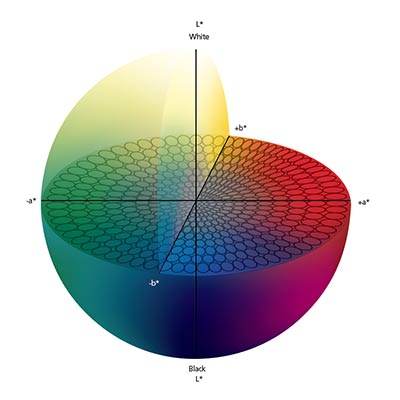

In the LAB color space, the L component represents the lightness or brightness of a color. It ranges from 0 to 100, where 0 represents black and 100 represents white. The A and B components represent the color information. The A component ranges from -128 to 127 and represents the green-red axis, with negative values indicating green and positive values indicating red. The B component also ranges from -128 to 127 and represents the blue-yellow axis, with negative values indicating blue and positive values indicating yellow.

The LAB color space is often used in various color-related applications, such as color image processing, color calibration, and color difference calculations. It provides a perceptually uniform color space, meaning that the same perceptual difference in LAB values corresponds to a similar visual difference to the human eye.

The provided code snippet showcases the conversion of an image to the Lab color space using the OpenCV library's *cv2.cvtColor* function. This function requires two inputs: the original image and the desired output color space, specified as *cv2.COLOR_RGB2LAB* in this case.

To visualize the Lab channels of a given RGB image, you can execute the function display_lab_channels(image_rgb).

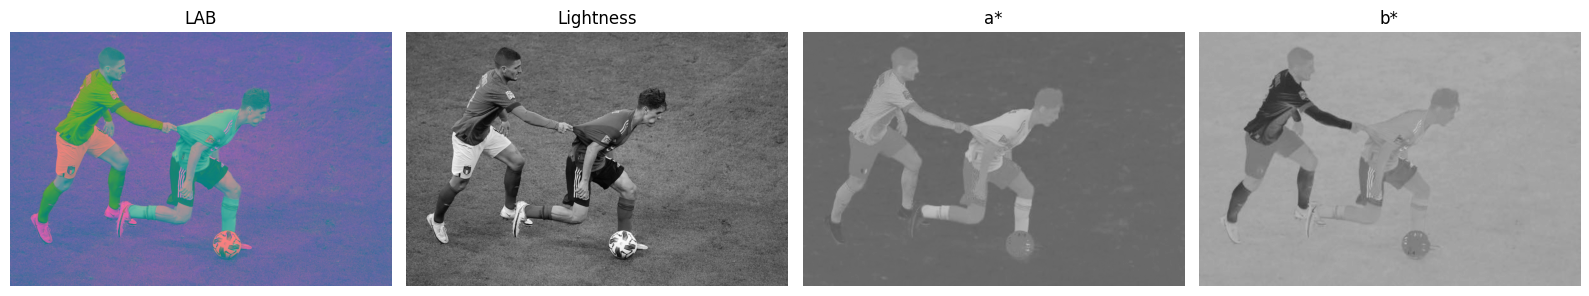

In [9]:

def display_lab_channels(image):

# Convert the image to the LAB color space
    lab_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2LAB)

    # Split the LAB image into individual channels
    l, a, b = cv2.split(lab_image)

    # Define channel names
    channel_names = ['Lightness', 'a*', 'b*']

    # Create a figure with subplots for channels and the original image
    fig, axes = plt.subplots(1, len(channel_names) + 1 , figsize=(16, 6))

    # Display the original image in HSV format
    axes[0].imshow(lab_image)
    axes[0].set_title('LAB')
    axes[0].axis('off')


    # Display the LAB channels
    for i, name in enumerate(channel_names):
        axes[i+1].imshow(lab_image[:, :, i], cmap='gray', vmin=0, vmax=255)
        #axes[i+1].imshow(lab_image[:, :, i], vmin=0, vmax=255)
        axes[i+1].set_title(name)
        axes[i+1].axis('off')

    # Automatically adjust the subplot positions and sizes
    plt.tight_layout()
    # Show the plot
    plt.show()

display_lab_channels(image_rgb)

#YCrCb color space

YCbCr is a color space in media formats like DVDs, LED TVs, and CDs. It consists of three channels for representing brightness and two for color information. The Y component, or luma, represents brightness and is more perceptually sensitive to the human eye. On the other hand, the Cb and Cr components, representing the blue-luma and red-luma differences, respectively, exhibit lower sensitivity.

Due to the varying sensitivity of the human eye, achieving absolute accuracy in representing color information in YCbCr may be optional. This allows for some tolerance in the encoding process. Consequently, precise accuracy can be optional, as the focus is more on preserving perceptually significant information than achieving meticulous color representation.

The given code snippet demonstrates the conversion of an image to the YCrCb color space using the cv2.cvtColor function from the OpenCV library. This function takes two parameters: the original image and the desired output color space, specified as cv2.COLOR_RGB2ycrcb in this particular example.

To visualize the YCrCb channels of an RGB image, you can utilize the function display_ycrcb_channels(image_rgb).


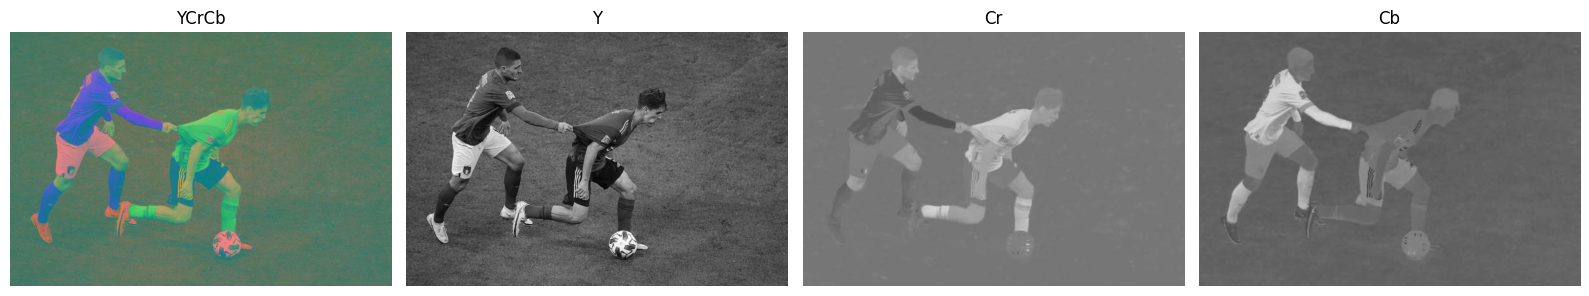

In [10]:
def display_ycrcb_channels(image):
    # Convert the image to the YCrCb color space
    ycrcb_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)

    # Split the YCrCb image into individual channels
    y, cr, cb = cv2.split(ycrcb_image)

    # Define channel names
    channel_names = ['Y', 'Cr', 'Cb']

    # Create a figure with subplots for channels and the original image
    fig, axes = plt.subplots(1, len(channel_names) + 1 , figsize=(16, 6))

    # Display the original image in YCrCb format
    axes[0].imshow(ycrcb_image)
    axes[0].set_title('YCrCb')
    axes[0].axis('off')

    # Display the YCrCb channels
    for i, name in enumerate(channel_names):
        axes[i+1].imshow(ycrcb_image[:, :, i], cmap='gray', vmin=0, vmax=255)
        axes[i+1].set_title(name)
        axes[i+1].axis('off')

    # Automatically adjust the subplot positions and sizes
    plt.tight_layout()
    # Show the plot
    plt.show()

display_ycrcb_channels(image_rgb)


#CMYK color space

The CMYK color model, also known as the process color or four-color model, is widely used in image processing and color printing. It is a subtractive color model that describes how colors are represented and combined in printed images.

In the CMYK model, colors are created by applying layers of cyan, magenta, yellow, and key (black) inks onto a surface, typically paper. Each ink absorbs or subtracts a certain amount of light, resulting in the perception of different colors. By carefully controlling the amounts of each ink, a wide range of colors can be achieved, allowing for precise color reproduction in printed images.

The CMYK color model is essential to image processing and color printing. Its subtractive nature and representation of colors using cyan, magenta, yellow, and black ink enable accurate color reproduction on print media. Understanding and utilizing the CMYK color space is crucial for researchers and practitioners working on image protection and analyzing colors in the context of print media.


The provided code snippet demonstrates the conversion of an RGB image to the CMYK color space and the display of its individual CMYK channels. As you can see, OpenCV does not provide a function to convert to CMYK color.

Here is an explanation of the code:


*   The RGB image is split into its individual channels (red, green, and blue) using the cv2.split() function.
*   The CMY channels (cyan, magenta, and yellow) are calculated by subtracting the respective channel values from 1 and normalizing the values to the range [0, 1] by dividing by 255.0.



*   The K channel (black) is determined by taking the minimum value among the CMY channels using the np.minimum() function.
*   The CMY channels are then normalized by subtracting the K channel value from each channel and dividing by the difference between 1 and K. This normalization ensures that the CMY channels represent the color intensity relative to the absence of black ink.





<ipython-input-11-bbce84a0da7d>:14: RuntimeWarning: invalid value encountered in true_divide
  c = (c - k) / (1 - k)
<ipython-input-11-bbce84a0da7d>:15: RuntimeWarning: invalid value encountered in true_divide
  m = (m - k) / (1 - k)
<ipython-input-11-bbce84a0da7d>:16: RuntimeWarning: invalid value encountered in true_divide
  y = (y - k) / (1 - k)


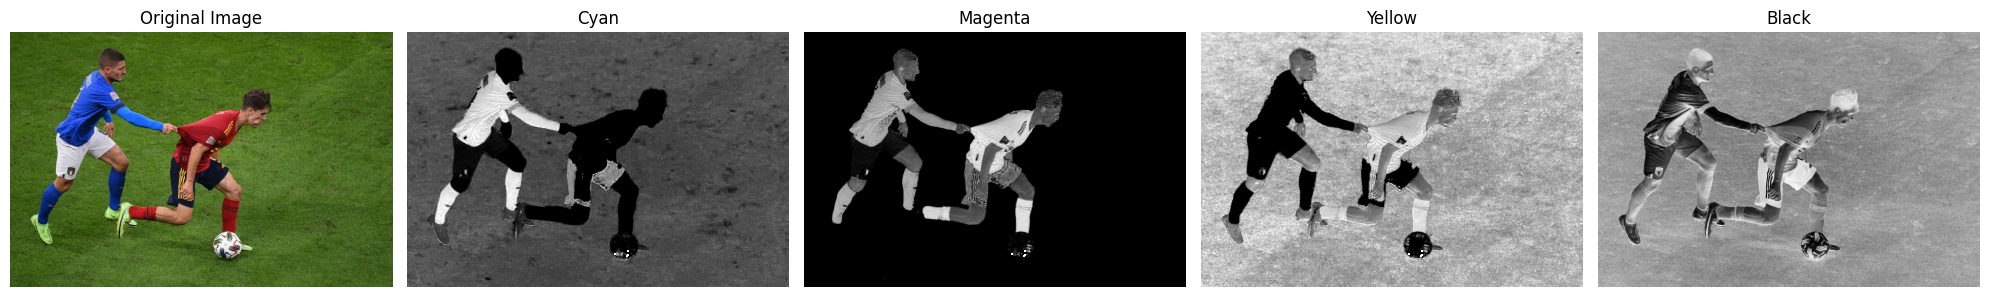

In [11]:
def display_cmyk_channels(image):
    # Split the RGB image into individual channels
    r, g, b = cv2.split(image)

    # Calculate the CMY channels
    c = 1 - r / 255.0
    m = 1 - g / 255.0
    y = 1 - b / 255.0

    # Calculate the K channel
    k = np.minimum(np.minimum(c, m), y)

    # Normalize CMY channels
    c = (c - k) / (1 - k)
    m = (m - k) / (1 - k)
    y = (y - k) / (1 - k)

    # Create a figure with subplots for channels and original image
    fig, axes = plt.subplots(1, 5, figsize=(20, 6))

    # Display the original image
    axes[0].imshow(image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Display the CMYK channels
    channel_names = ['Cyan', 'Magenta', 'Yellow', 'Black']
    for i in range(4):
        axes[i+1].imshow([c, m, y, k][i], cmap='gray')
        axes[i+1].set_title(channel_names[i])
        axes[i+1].axis('off')

    # Automatically adjust the subplot positions and sizes
    plt.tight_layout()

    # Show the plot
    plt.show()

# Call the function with the image as an argument
display_cmyk_channels(image_rgb)


Here is another implementation to convert an RGB image to a CMYK color space and displaying the CMKY channels. The code begins by converting the RGB image to a float representation between 0 and 1. Then, it subtracts the RGB values from 1 to obtain the CMY values. The resulting CMY values are normalized by dividing them by the maximum value of 1, which is equivalent to dividing by 255 when the RGB values are in the range of 0-255.

**Calculate the K channel: The code determines the K (black) channel by finding the minimum value among the normalized CMY channels.**

<ipython-input-12-7eb9bd5147f7>:4: RuntimeWarning: invalid value encountered in true_divide
  cmy_norm = (cmy - cmy_min[:, :, None]) / (1 - cmy_min[:, :, None])


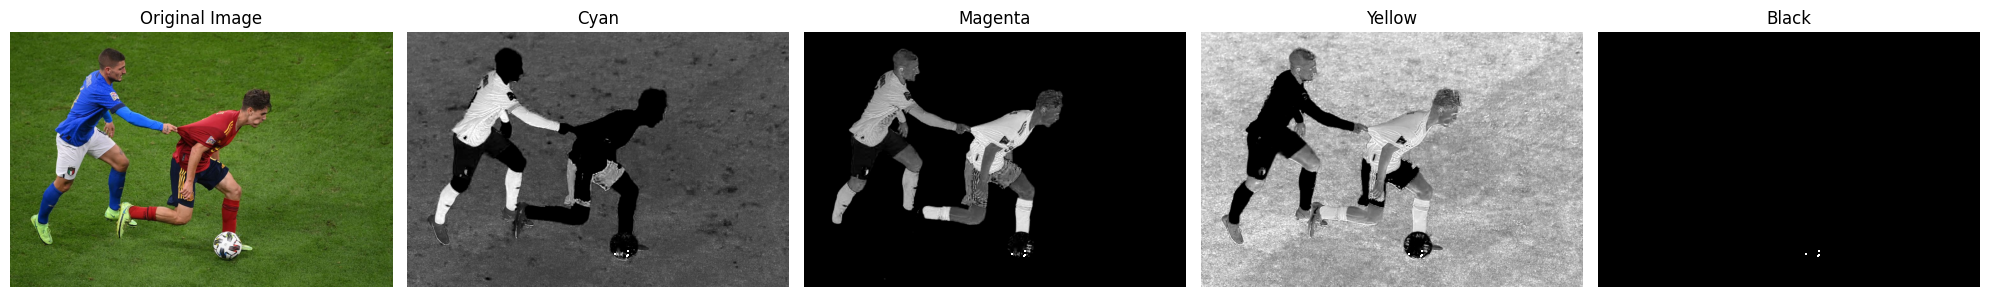

In [12]:
# Calculate the CMY channels and normalize them
cmy = 1 - image_rgb.astype(float) / 255.0
cmy_min = np.min(cmy, axis=2)
cmy_norm = (cmy - cmy_min[:, :, None]) / (1 - cmy_min[:, :, None])

# Calculate the K channel
k = np.min(cmy_norm, axis=2)

# Create a figure with subplots for channels and original image
fig, axes = plt.subplots(1, 5, figsize=(20, 6))

# Display the original image
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display the CMYK channels
channel_names = ['Cyan', 'Magenta', 'Yellow', 'Black']
for i in range(3):
    axes[i + 1].imshow(cmy_norm[:, :, i], cmap='gray', vmin=0, vmax=1)
    axes[i + 1].set_title(channel_names[i])
    axes[i + 1].axis('off')

axes[4].imshow(k, cmap='gray', vmin=0, vmax=1)
axes[4].set_title('Black')
axes[4].axis('off')

# Automatically adjust the subplot positions and sizes
plt.tight_layout()

# Show the plot
plt.show()


# XYZ color space

The XYZ color space, also known as CIE XYZ or CIE 1931 XYZ, is a device-independent color space widely used in color science and computer vision. It is based on the human perception of color and is designed to represent all visible colors.

In OpenCV, you can convert an image to the XYZ color space using the cv2.cvtColor() function with the parameter cv2.COLOR_RGB2XYZ or cv2.COLOR_BGR2XYZ, depending on the input image's color channel order.

In the XYZ color space, X, Y, and Z represent the tristimulus values of the image. X and Z are related to brightness, while Y represents the luminance. The importance of X, Y, and Z are typically normalized to the range [0, 1].

Converting an image to the XYZ color space can be helpful for various tasks in image processing, such as color analysis, color correction, and color-based feature extraction. It provides a device-independent representation of color, making it suitable for color-related algorithms and applications.


The provided code snippet demonstrates the usage of cv2.cvtColor() function from OpenCV library to convert an image to the XYZ color space. The function requires two parameters: the original image and the desired output color space. In this example, the desired output color space is specified as cv2.COLOR_RGB2XYZ, indicating the conversion from RGB color space to XYZ color space.

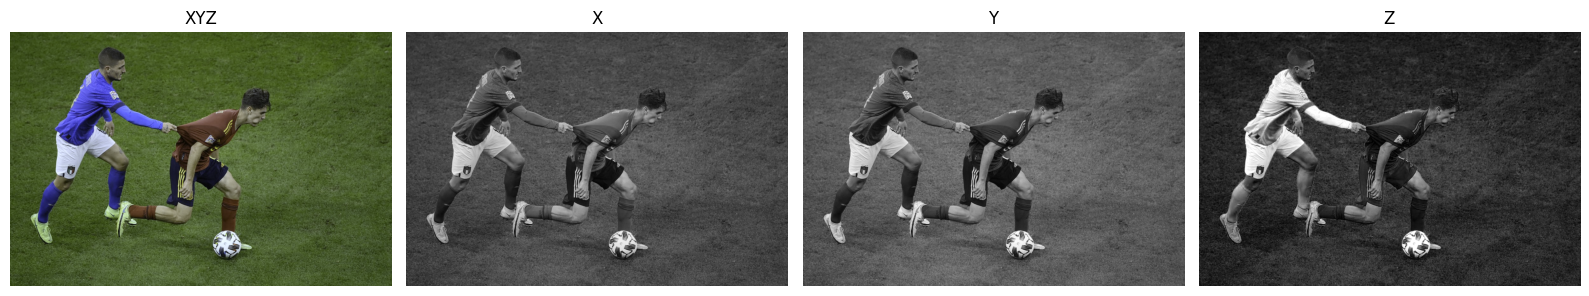

In [14]:
def display_xyz_channels(image):
    # Convert the image to the XYZ color space
    xyz_image = cv2.cvtColor(image, cv2.COLOR_RGB2XYZ)

    # Split the XYZ image into individual channels
    x, y, z = cv2.split(xyz_image)

    # Define channel names
    channel_names = ['X', 'Y', 'Z']

    # Create a figure with subplots for channels and the original image
    fig, axes = plt.subplots(1, len(channel_names) + 1, figsize=(16, 6))

    # Display the original image in XYZ format
    axes[0].imshow(xyz_image)
    axes[0].set_title('XYZ')
    axes[0].axis('off')

    # Display the XYZ channels
    for i, name in enumerate(channel_names):
        axes[i+1].imshow(xyz_image[:, :, i], cmap='gray', vmin=0, vmax=255)
        axes[i+1].set_title(name)
        axes[i+1].axis('off')

    # Automatically adjust the subplot positions and sizes
    plt.tight_layout()
    # Show the plot
    plt.show()

display_xyz_channels(image_rgb)


In this notebook,we explored various color spaces commonly used in image processing and computer vision. Each color space provides a different representation of colors and has its unique characteristics and applications.

Happy coding and exploring the colourful world of image processing!

#References



* [Color Spaces and How to Use Them With OpenCV and Python](http://www.pybloggers.com/2018/09/color-spaces-and-how-to-use-them-with-opencv-and-python/)
* [OpenCV Color Spaces ( cv2.cvtColor )](https://pyimagesearch.com/2021/04/28/opencv-color-spaces-cv2-cvtcolor/?_ga=2.148797236.2056940651.1686825925-1664772421.1674074395)
* [HSL and HSV color space](https://en.wikipedia.org/wiki/HSL_and_HSV)

* [LAB color space](https://en.wikipedia.org/wiki/CIELAB_color_space)
* [RGB color cube](https://commons.wikimedia.org/wiki/Category:RGB_color_cube)
* [YCbCr color space](https://en.wikipedia.org/wiki/YCbCr)
* [CMYK color model](https://en.wikipedia.org/wiki/CMYK_color_model)
* [CIE 1931 color space](https://en.wikipedia.org/wiki/CIE_1931_color_space)




